 *=======================================================================================*
  *CP2, 21100276 CODE FOR PHISHING DETECTION AND ANALYSIS*                                 
 *=======================================================================================*

https://www.kaggle.com/datasets/akashkr/phishing-website-dataset 

dataset link

STEP 1, LOAD DATA

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Loads the dataset

try:
    #loading standard Kaggle dataset names
    df = pd.read_csv('dataset.csv') 
    print("Dataset Lock andd Loaded!!")

    #exception handling if file not found OR for others who simply want to test the code without downloading the dataset
except FileNotFoundError:
    print("ERRORRRRRRRR File not found =.= Please download the dataset from Kaggle and rename it to 'phishing.csv' :)  <3 ")
    from sklearn.datasets import make_classification
    X_dummy, y_dummy = make_classification(n_samples=1000, n_features=30, random_state=42)
    df = pd.DataFrame(X_dummy, columns=[f'Feature_{i}' for i in range(30)])
    df['Result'] = y_dummy

# Show basic info abt dataset
print(df.info())
print(df.describe())


Dataset Lock andd Loaded!!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL        

STEP 2, PRE-PROCESSING THE DATA

In [29]:
#identifying target columns
# target column is named 'class' or 'Result' (-1: Phishing, 1: Legit)
target_col = 'Result' if 'Result' in df.columns else df.columns[-1]
X = df.drop(target_col, axis=1)
y = df[target_col]

# Split & Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



STEP 3, TRAINING & EVALUATION

In [31]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naïve Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, kernel='rbf', random_state=42)
}

# Storage for metrics
model_results = {}
training_times = {}

print("\nTraining Models...")
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    model_results[name] = {"Prediction": y_pred, "Probability": y_prob, "Accuracy": acc}
    training_times[name] = end_time - start_time
    print(f" -> {name} trained in {training_times[name]:.4f}s (Acc: {acc:.2%})")


Training Models...
 -> KNN trained in 0.0020s (Acc: 94.53%)
 -> Naïve Bayes trained in 0.0070s (Acc: 57.80%)
 -> Random Forest trained in 0.4694s (Acc: 96.74%)
 -> SVM trained in 4.6064s (Acc: 95.25%)


STEP4, Visualise the output & model comparison for each  machine learning techniques used for phishing detection
(USED FOR CHAP4, RESULTS AND DISCUSSION)

fig 1. Class Distribution (Data Balance)

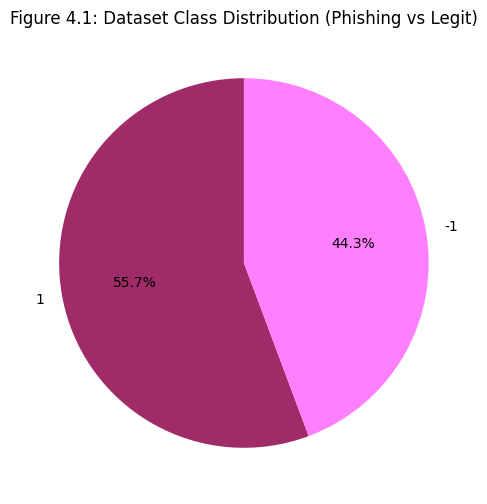

In [ ]:
plt.figure(figsize=(6, 6))
y.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#9f2b68','#ff80ff'], startangle=90)
plt.title('Figure 4.1: Dataset Class Distribution (Phishing vs Legit)')
plt.ylabel('')
plt.show()

fig 2. Corr. Heatmap (Feature Analysis)

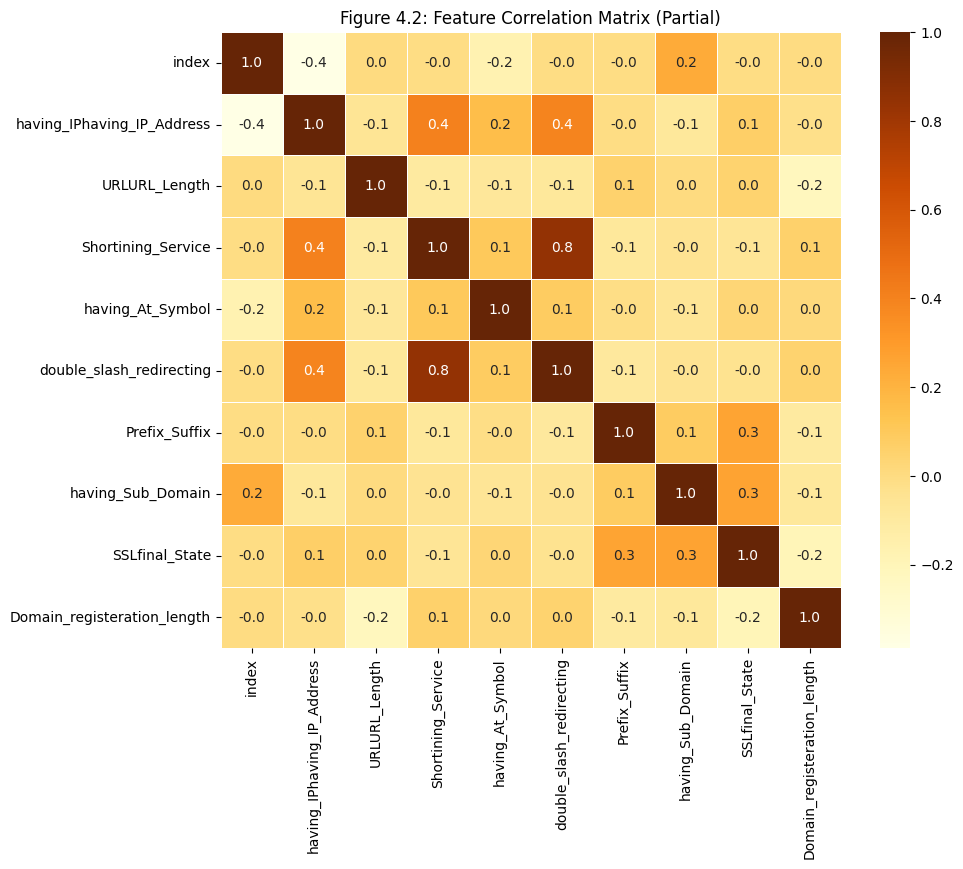

In [ ]:
# first 10 features for readability
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, :10].corr(), annot=True, fmt='.1f', cmap='YlOrBr', linewidths=0.5)
plt.title('Figure 4.2: Feature Correlation Matrix (Partial)')
plt.show()



Fig3. Accuracy Comparison Bar Chart

C:\Users\Anthony\AppData\Local\Temp\ipykernel_24428\2295255925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=[res['Accuracy'] for res in model_results.values()], palette='viridis')


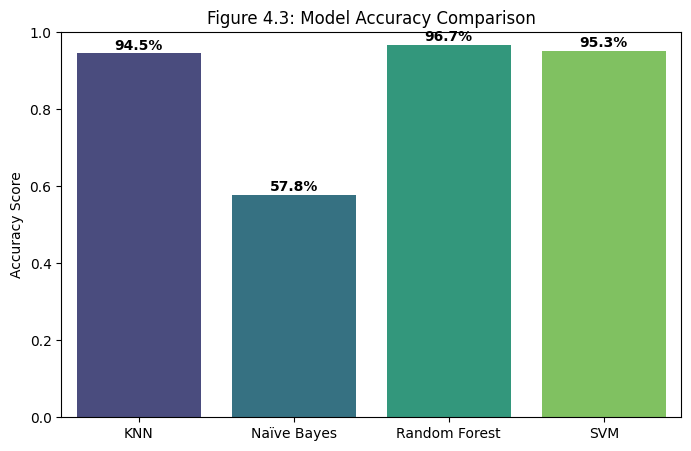

In [36]:
plt.figure(figsize=(8, 5))

# Create the bar plot
sns.barplot(x=list(model_results.keys()), y=[res['Accuracy'] for res in model_results.values()], palette='viridis')

plt.title('Figure 4.3: Model Accuracy Comparison')
plt.ylabel('Accuracy Score')

# Set the bottom limit to 0 or 0.5 so no bars get cut off
plt.ylim(0.0, 1.0) 

# Add the actual numbers on top of the bars to see the exact score
for i, v in enumerate([res['Accuracy'] for res in model_results.values()]):
    plt.text(i, v + 0.01, f"{v:.1%}", ha='center', fontweight='bold')

plt.show()

Fig 4.ROC Curves (Separability Analysis)

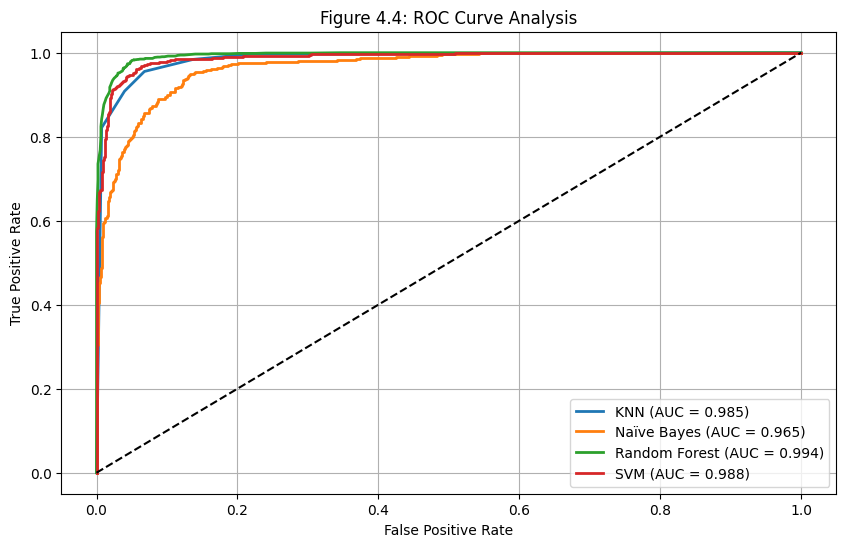

In [37]:

plt.figure(figsize=(10, 6))
for name, res in model_results.items():
    fpr, tpr, _ = roc_curve(y_test, res["Probability"], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Figure 4.4: ROC Curve Analysis')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

Fig.5 Training Time (Efficiency Analysis)

C:\Users\Anthony\AppData\Local\Temp\ipykernel_24428\2786119828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=list(training_times.keys()), y=list(training_times.values()), palette='magma')


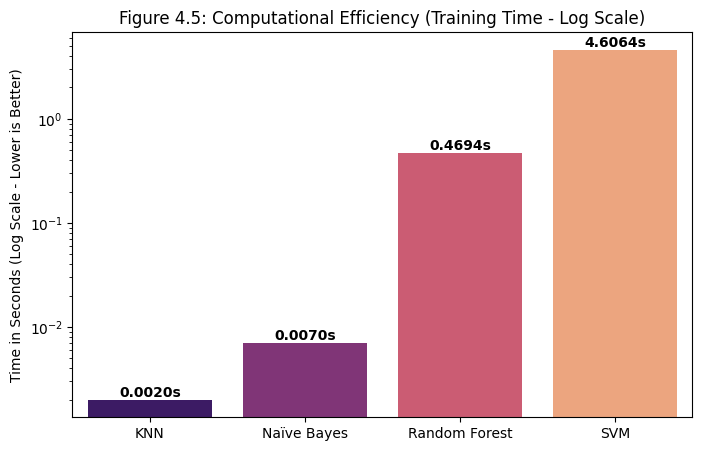

In [38]:
plt.figure(figsize=(8, 5))

# Create bar chart
barplot = sns.barplot(x=list(training_times.keys()), y=list(training_times.values()), palette='magma')

# --- FIX: Use Logarithmic Scale to make fast models visible ---
plt.yscale('log') 

plt.title('Figure 4.5: Computational Efficiency (Training Time - Log Scale)')
plt.ylabel('Time in Seconds (Log Scale - Lower is Better)')

# Add text labels on top of bars (so you can see the tiny numbers)
for i, v in enumerate(training_times.values()):
    plt.text(i, v, f"{v:.4f}s", ha='center', va='bottom', fontweight='bold')

plt.show()

Fig.6 Confusion Matrices (Error Analysis)

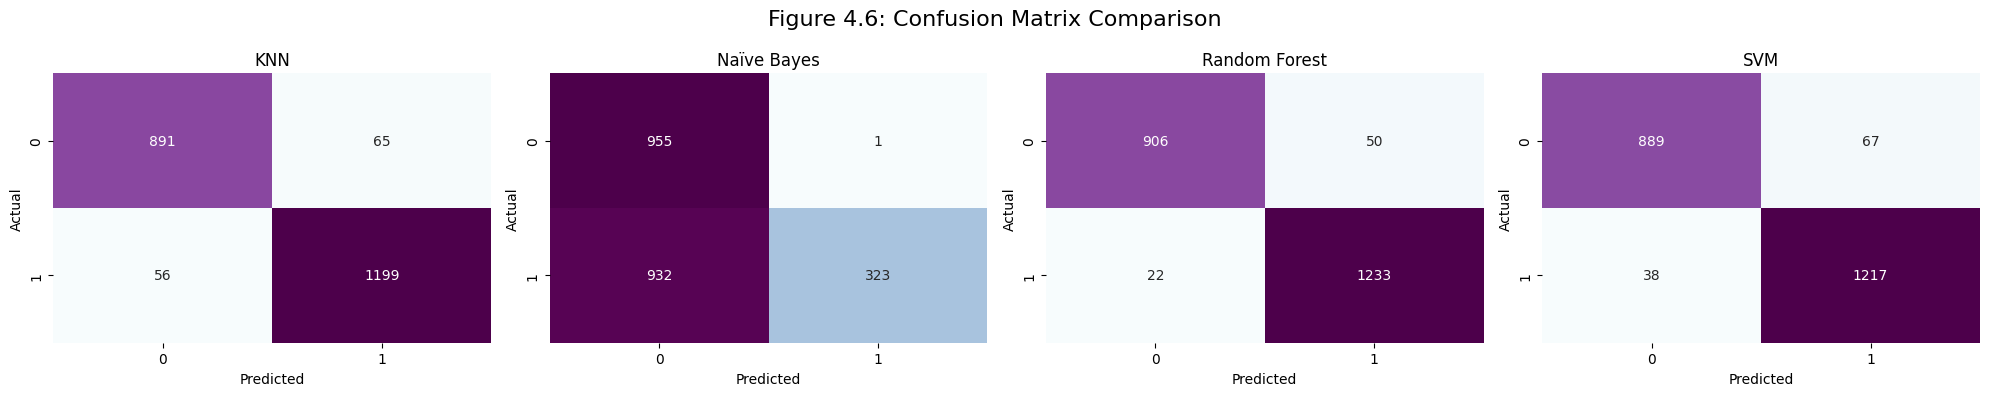

In [39]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for ax, (name, res) in zip(axes, model_results.items()):
    cm = confusion_matrix(y_test, res["Prediction"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', ax=ax, cbar=False)
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.suptitle('Figure 4.6: Confusion Matrix Comparison', fontsize=16)
plt.tight_layout()
plt.show()